In [1]:
import os, os.path as osp
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# torch.cuda.init()
# assert torch.cuda.is_initialized
# print(torch.cuda.get_device_properties(0)

In [3]:
df = pd.read_csv('datasets/tb-wellgen-smear/v1/tb-labels.csv', index_col=None)
df.head()

,image,tb_positive,file_path
0,tb00000001.jpg,0,/home/ngsci/datasets/tb-wellgen-smear/images/0...
1,tb00000002.jpg,0,/home/ngsci/datasets/tb-wellgen-smear/images/0...
2,tb00000003.jpg,0,/home/ngsci/datasets/tb-wellgen-smear/images/0...
3,tb00000004.jpg,0,/home/ngsci/datasets/tb-wellgen-smear/images/0...
4,tb00000005.jpg,1,/home/ngsci/datasets/tb-wellgen-smear/images/0...


In [4]:
import matplotlib.pyplot as plt
from PIL import Image

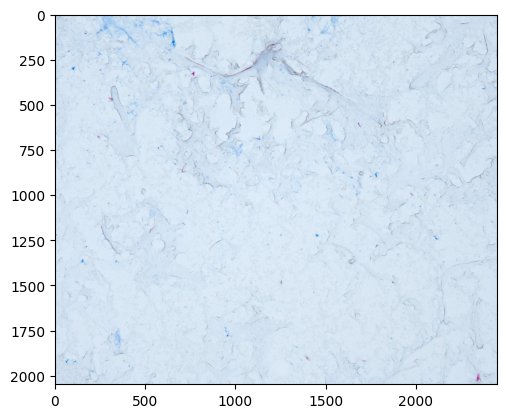

In [5]:
plt.imshow(Image.open(df.file_path.values[0]))

In [6]:
df=df.rename(columns={'file_path': 'image_id', 'tb_positive': 'label', 'image_name':'image'})
df.head(1)

,image,label,image_id
0,tb00000001.jpg,0,/home/ngsci/datasets/tb-wellgen-smear/images/0...


In [7]:
np.unique(df.label.values, return_counts=True)

(array([0, 1]), array([71111,  3976]))

In [8]:
df.shape

(75087, 3)

In [10]:
num_ims = len(df)
meh, df_val1 = train_test_split(df, test_size=num_ims//5, random_state=0, stratify=df.label)
meh, df_val2 = train_test_split(meh,    test_size=num_ims//5, random_state=0, stratify=meh.label)
meh, df_val3 = train_test_split(meh,    test_size=num_ims//5, random_state=0, stratify=meh.label)
df_val5, df_val4 = train_test_split(meh,test_size=num_ims//5, random_state=0, stratify=meh.label)

df_train1 = pd.concat([df_val2,df_val3,df_val4,df_val5], axis=0)
df_train2 = pd.concat([df_val1,df_val3,df_val4,df_val5], axis=0)
df_train3 = pd.concat([df_val1,df_val2,df_val4,df_val5], axis=0)
df_train4 = pd.concat([df_val1,df_val2,df_val3,df_val5], axis=0)
df_train5 = pd.concat([df_val1,df_val2,df_val3,df_val4], axis=0)

df_train1.to_csv('tr_f1.csv', index=None)
df_val1.to_csv('vl_f1.csv', index=None)

df_train2.to_csv('tr_f2.csv', index=None)
df_val2.to_csv('vl_f2.csv', index=None)

df_train3.to_csv('tr_f3.csv', index=None)
df_val3.to_csv('vl_f3.csv', index=None)

df_train4.to_csv('tr_f4.csv', index=None)
df_val4.to_csv('vl_f4.csv', index=None)

df_train5.to_csv('tr_f5.csv', index=None)
df_val5.to_csv('vl_f5.csv', index=None)